In [1]:
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle('./Data/Data/blocks_mined_while_status_ico__block_data_pickle.p')

In [3]:
trans = pd.read_pickle('./Data/Data/status_ico_transactions.p')

In [18]:
pprint(df)

{'uncles': [{'blockreward': '3750000000000000000', 'unclePosition': '0', 'miner': '0x61c808d82a3ac53231750dadc13c777b59310bd9'}], 'timeStamp': '1497973929', 'blockReward': '6615234868921832132', 'uncleInclusionReward': '156250000000000000', 'blockMiner': '0xc0ea08a2d404d3172d2add29a45be56da40e2949', 'blockNumber': '3903901'}


In [15]:
print(miners['0x61c808d82a3ac53231750dadc13c777b59310bd9'])

{'blockCount': 1036, 'blocks': ['3903912', '3903913', '3903915', '3903916', '3903924', '3903929', '3903930', '3903944', '3903955', '3903966', '3903971', '3903982', '3903983', '3903984', '3903985', '3903990', '3903995', '3903997', '3904001', '3904004', '3904006', '3904008', '3904009', '3904011', '3904015', '3904024', '3904051', '3904055', '3904060', '3904061', '3904063', '3904066', '3904067', '3904069', '3904072', '3904073', '3904077', '3904079', '3904090', '3904093', '3904112', '3904115', '3904116', '3904117', '3904121', '3904122', '3904124', '3904126', '3904130', '3904138', '3904142', '3904143', '3904144', '3904147', '3904149', '3904150', '3904154', '3904157', '3904158', '3904159', '3904161', '3904162', '3904166', '3904172', '3904176', '3904178', '3904180', '3904183', '3904184', '3904186', '3904192', '3904213', '3904214', '3904218', '3904219', '3904220', '3904224', '3904232', '3904234', '3904237', '3904238', '3904242', '3904243', '3904244', '3904251', '3904260', '3904271', '3904274', 

In [20]:
miners = {}
blocks = {}
for i in range(len(df)):
    blocks[df[i]['blockNumber']] = {'miner':df[i]['blockMiner'],'transCount':0,'errorCount':0,'trueCount':0}
    miner = df[i]['blockMiner']
    if miner in miners:
        miners[miner]['blockCount'] += 1
        miners[miner]['blocks'].append(df[i]['blockNumber'])
    else:
        miners[miner] = {}
        miners[miner]['blockCount'] = 1
        miners[miner]['errorCount'] = 0
        miners[miner]['blocks'] = [df[i]['blockNumber']]

In [24]:
for bnum in miners['0x61c808d82a3ac53231750dadc13c777b59310bd9']['blocks']:
    if blocks[bnum]['transCount'] > 0:
        print(bnum,blocks[bnum]['transCount'],blocks[bnum]['errorCount'])

3903912 95 0
3903913 27 0
3903944 36 36
3903955 25 25
3903982 5 0
3903983 1 0
3904001 1 0
3904122 2 0
3904144 2 0
3904420 1 1
3905034 2 1
3905155 11 0
3905359 4 2


In [32]:
print(trans.keys())

Index(['blockHash', 'blockNumber', 'confirmations', 'contractAddress',
       'cumulativeGasUsed', 'errCode', 'from', 'gas', 'gasPrice', 'gasUsed',
       'hash', 'input', 'isError', 'nonce', 'timeStamp', 'to', 'traceId',
       'transactionIndex', 'txreceipt_status', 'type', 'value'],
      dtype='object')


In [22]:
notIn = []
p2pool = []
for i in range(len(trans)):
    bnum = str(trans['blockNumber'][i])
#     if (trans['blockNumber'] in )
    if bnum in blocks:
        miner = blocks[bnum]['miner']
        blocks[bnum]['transCount'] += 1
        if trans['isError'][i] == '1':
            miners[miner]['errorCount'] += 1
            blocks[bnum]['errorCount'] += 1
        else:
            blocks[bnum]['trueCount'] += 1
    else:
        if bnum not in notIn:
            notIn.append(bnum)

In [6]:
wOutTrans = []
wTrans = []

for bnum in blocks:
    if blocks[bnum]['transCount'] > 0:
        blocks[bnum]['ratio'] = 1.0*blocks[bnum]['errorCount']/blocks[bnum]['transCount']
        wTrans.append(bnum)
    else:
        wOutTrans.append(bnum)
        blocks[bnum]['ratio'] = 0

In [72]:
print(len(wOutTrans))
print(len(wTrans))

3503
626


In [7]:
x = []
y = []
z = []
t = []
for bnum in wTrans:
    x.append(bnum)
    y.append(blocks[bnum]['ratio'])
    z.append(blocks[bnum]['transCount'])
    t.append(blocks[bnum]['miner']=='0x61c808d82a3ac53231750dadc13c777b59310bd9')

In [70]:
print(blocks['3903910'])

{'trueCount': 2, 'miner': '0xb2930b35844a230f00e51431acae96fe543a0347', 'transCount': 35, 'ratio': 0.9428571428571428, 'errorCount': 33}


In [8]:
minersInd = []
for m in miners:
    minersInd.append(m)
    miners[m]['ind'] = len(minersInd) - 1

In [9]:
errCounts = []
blockCounts = []
for i in range(len(minersInd)):
    errCounts.append(miners[minersInd[i]]['errorCount'])
    blockCounts.append(miners[minersInd[i]]['blockCount'])

In [57]:
z = np.array(z)

In [59]:
print((z<3).sum())
print(z.shape)

67
(626,)


In [10]:
print(len(blocks))

4129


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(311)
ax.bar(blocks.keys(),range(len(blocks.keys())))

<BarContainer object of 626 artists>

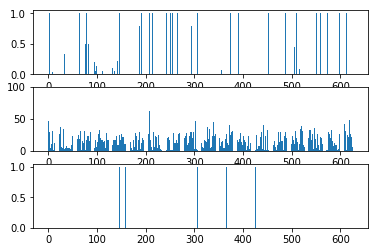

In [66]:
fig = plt.figure()
ax = fig.add_subplot(311)

ax.bar(range(len(x)),y)

ax2 = fig.add_subplot(312)
ax2.bar(range(len(x)),z)

ax3 = fig.add_subplot(313)
ax3.bar(range(len(x)),t)

In [47]:
pprint(miners)

{'0x1e9939daaad6924ad004c2560e90804164900341': {'blockCount': 526,
                                                'errorCount': 488,
                                                'ind': 2},
 '0x215c86bc952b0d98c4b2313a0a9ae56fa33c7f5d': {'blockCount': 6,
                                                'errorCount': 48,
                                                'ind': 19},
 '0x2a65aca4d5fc5b5c859090a6c34d164135398226': {'blockCount': 278,
                                                'errorCount': 4,
                                                'ind': 18},
 '0x3f4e874d4218ce28709524e05bcbf946b7d8a1b8': {'blockCount': 1,
                                                'errorCount': 0,
                                                'ind': 3},
 '0x49deb42acbbce35aa74f6df0be77162463658081': {'blockCount': 10,
                                                'errorCount': 0,
                                                'ind': 8},
 '0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01'